# Cat-Dog Classification with Deep Learning
Bu projede derin öğrenme kullanarak resimlerdeki kedi-köpek ayrımı yapabilen bir model geliştirilecektir. Model için gerekli resimler bing_image_downloader kütüphanesi 
kullanılarak indirilmiş ve cat, dog isimleri ile etiketlenmiştir.<br><br>
<img src="https://image.milimaj.com/i/milliyet/75/0x410/6175f02d45d2a0a1041987c0.jpg" width=300>

### Veri Setinin Oluşturulması

In [4]:
# pip install bing-image-downloader

In [1]:
from bing_image_downloader import downloader

In [1]:
#downloader.download("cat", limit=300)

In [2]:
#downloader.download("dog", limit=300)

### Görüntü Ön İşleme

In [1]:
import cv2
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
img_path="dataset/"
labels = ["cat", "dog"]

In [3]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+"/"+img_file)
        label_list.append(label)

In [4]:
df=pd.DataFrame({"img":img_list, "label":label_list})

In [5]:
df["label"].value_counts()

label
cat    186
dog    179
Name: count, dtype: int64

In [6]:
df.sample(10)

,img,label
63,dataset/cat/Image_180.jpg,cat
85,dataset/cat/Image_210.png,cat
339,dataset/dog/Image_7.JPG,dog
151,dataset/cat/Image_64.jpg,cat
352,dataset/dog/Image_87.jpeg,dog
51,dataset/cat/Image_166.png,cat
135,dataset/cat/Image_49.jpg,cat
76,dataset/cat/Image_20.jpg,cat
124,dataset/cat/Image_39.jpg,cat
61,dataset/cat/Image_179.jpg,cat


In [7]:
d={"cat":0, "dog":1}

In [8]:
df["encode_label"]= df["label"].map(d)

In [9]:
df=df.sample(frac=1)
df = df.reset_index(drop=True)

In [10]:
df.head()

,img,label,encode_label
0,dataset/dog/Image_192.jpg,dog,1
1,dataset/dog/Image_25.jpg,dog,1
2,dataset/dog/Image_156.jpg,dog,1
3,dataset/dog/Image_215.jpg,dog,1
4,dataset/cat/Image_225.jpg,cat,0


In [11]:
img=cv2.imread(str(df["img"][0]))
img.shape

(2304, 1536, 3)

In [12]:
size=125
x=[]
for imge in df["img"]:
    img=cv2.imread(str(imge))
    #print(imge)
    img=cv2.resize(img, (size,size))
    img=img/255.0 
    x.append(img)

In [13]:
len(x)

365

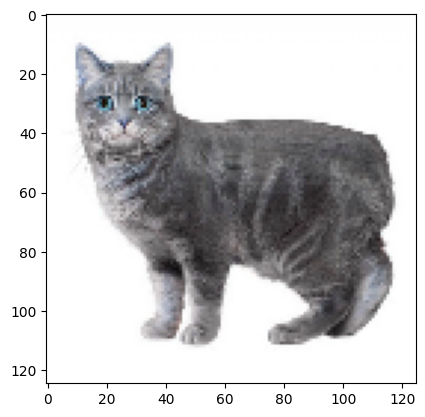

In [14]:
plt.imshow(x[200])

### Modelleme

In [15]:
x=np.array(x)
y=df['encode_label']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [17]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout,BatchNormalization, Reshape

In [26]:
model=Sequential()
model.add(Input(shape=(size,size,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
history=model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=100, verbose=1)

Epoch 1/100
10/10 [==============================] - 8s 449ms/step - loss: 38.6629 - accuracy: 0.5137 - val_loss: 5.7468 - val_accuracy: 0.4658
Epoch 2/100
10/10 [==============================] - 2s 198ms/step - loss: 21.4120 - accuracy: 0.5342 - val_loss: 5.1325 - val_accuracy: 0.5068
Epoch 3/100
10/10 [==============================] - 2s 198ms/step - loss: 7.0818 - accuracy: 0.5342 - val_loss: 23.7275 - val_accuracy: 0.4521
Epoch 4/100
10/10 [==============================] - 2s 197ms/step - loss: 5.4997 - accuracy: 0.5342 - val_loss: 7.6949 - val_accuracy: 0.4932
Epoch 5/100
10/10 [==============================] - 2s 199ms/step - loss: 5.4931 - accuracy: 0.5685 - val_loss: 5.7074 - val_accuracy: 0.5342
Epoch 6/100
10/10 [==============================] - 2s 200ms/step - loss: 2.8365 - accuracy: 0.6233 - val_loss: 7.6197 - val_accuracy: 0.5342
Epoch 7/100
10/10 [==============================] - 2s 201ms/step - loss: 2.2014 - accuracy: 0.6815 - val_loss: 2.8185 - val_accuracy: 0.4

In [28]:
loss, accuracy = model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 39ms/step - loss: 19.2279 - accuracy: 0.5205


In [29]:
accuracy

0.5205479264259338

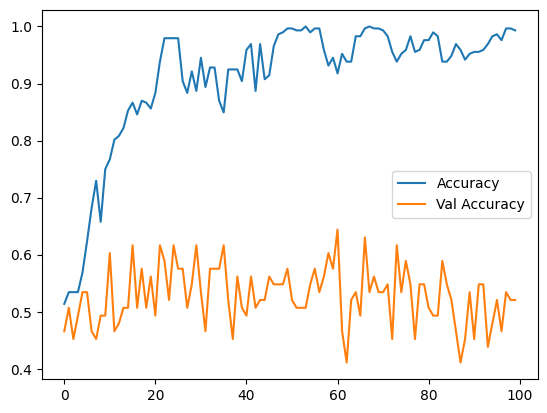

In [30]:
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()

In [31]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [32]:
pred = model.predict(x_test)

3/3 [==============================] - 0s 117ms/step


In [33]:
confusion_matrix(y_test, np.argmax(pred, axis=1))

array([[22, 18],
       [17, 16]], dtype=int64)

1/1 [==============================] - 0s 31ms/step


('dog', array([[0., 1.]], dtype=float32))

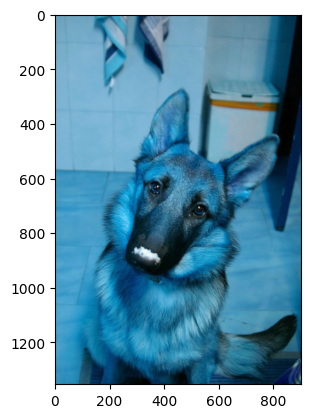

In [35]:
#dataset/female/Image_57.jpeg
img="dataset/dog/Image_1.jpg"
img=cv2.imread(img)
plt.imshow(img)
img=cv2.resize(img, (size,size))
img=img/255.0 
img=np.array(img)
img=np.expand_dims(img, axis=0)
tahmin=model.predict(img)
labels[np.argmax(tahmin)], np.round(tahmin,3)

### Sonuç:
Bu projede bing_image_downloader kütüphanesi kullanılarak internetten indirilen kedi ve köpek resimleri ile derin öğrenme modeli geliştirilmiştir. 
Modelde orta seviye bir başarı elde edilmiştir. Modelin başarısını artırmak için daha fazla kedi ve köpek resmi indirip modeli eğitmek gerekebilir. 
Ayrıca geliştirilen yapay sinir ağı daha derin ve daha geniş yapılarak başarı artırılabilir. Ancan bunun için güçlü makineye ihtiyaç duyulmaktadır. 